In [56]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
 ("Materias", 'Noticias', 'Curiosidade', 'CoronaVirus')

In [38]:
base = sqlite3.connect("D:\PROJETOS PY\FreeCodeCamp Python\DATABASE\AventuraPoste.db")
database = base.cursor()


In [264]:
df = pd.read_sql("SELECT * FROM 'Poste'", base, parse_dates=['Data'], index_col='Data')

In [43]:
df.shape

(24399, 7)

In [49]:
df["Nome"].value_counts()[:10]

Redação              2700
Fabio Previdelli     2247
Isabela Barreiros    2238
Penélope Coelho      2150
Pamela Malva         1784
Wallacy Ferrari      1692
Ingredi Brunato      1445
Alana Sousa          1151
André Nogueira       1056
Caio Tortamano        854
Name: Nome, dtype: int64

In [50]:
df.head(5)

,Id,Nome,Categoria,Data,Titulo,Hora,Link
0,1,Penélope Coelho,Materias,13/04/2021,A dolorosa relação entre William e Harry: Toma...,14h11,https://aventurasnahistoria.uol.com.br/noticia...
1,2,Fabio Previdelli,Materias,13/04/2021,Das cartas ao trágico acidente: a relação entr...,13h44,https://aventurasnahistoria.uol.com.br/noticia...
2,3,Penélope Coelho,Materias,13/04/2021,Como a história de Wallis Simpson se assemelha...,11h24,https://aventurasnahistoria.uol.com.br/noticia...
3,4,Giovanna Gomes,Materias,13/04/2021,"A insólita ligação entre o rei Edward VIII, ti...",10h37,https://aventurasnahistoria.uol.com.br/noticia...
4,5,Ingredi Brunato,Materias,12/04/2021,"Quem herdará o título do príncipe Philip, Duqu...",18h30,https://aventurasnahistoria.uol.com.br/noticia...


In [54]:
df['Data'].value_counts()

14/09/2020    58
21/09/2020    55
31/08/2021    53
26/10/2020    52
30/11/2021    52
              ..
31/03/2018     1
13/09/2017     1
23/07/2018     1
17/01/2017     1
05/02/2018     1
Name: Data, Length: 1409, dtype: int64

In [93]:
contagem = df['Data'].value_counts()[:10]

In [95]:
contagem

14/09/2020    58
21/09/2020    55
31/08/2021    53
26/10/2020    52
30/11/2021    52
02/12/2021    51
13/10/2020    51
26/10/2021    50
29/11/2021    49
28/07/2021    49
Name: Data, dtype: int64

<AxesSubplot:>

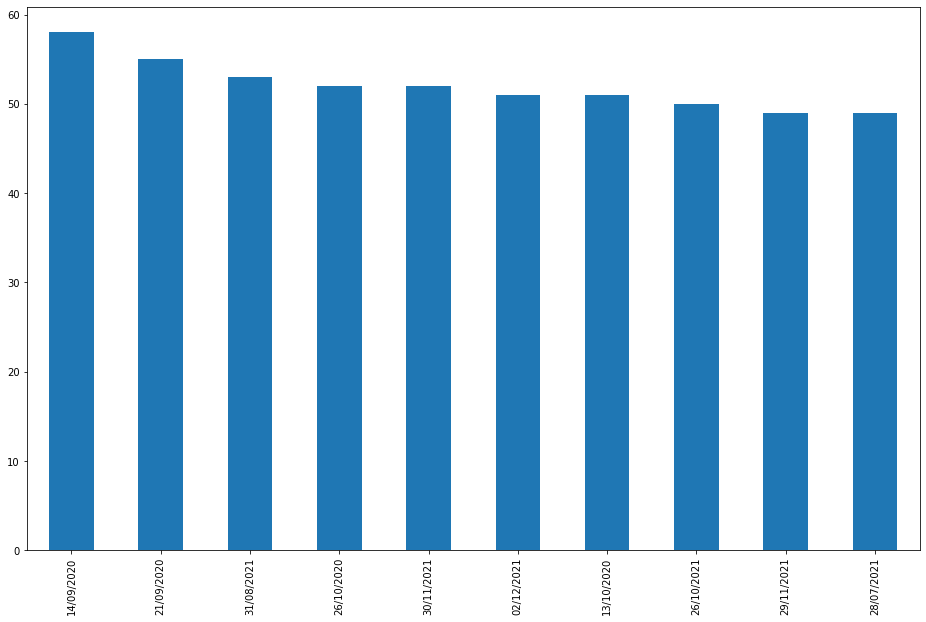

In [98]:
obj = plt.subplots(figsize=(16,10))
fig, ax1 = obj
contagem.plot(ax=ax1, kind="bar")


In [175]:
df["year"] = df.index.year

In [176]:
df['year'].value_counts()

2021    10615
2020    10357
2019     2886
2018      352
2017      154
2016       21
2008        4
2009        3
2006        2
2007        2
2010        1
2011        1
2012        1
Name: year, dtype: int64

In [250]:
df

,Id,Nome,Categoria,Titulo,Hora,Link
Data,,,,,,
2021-04-13,1,Penélope Coelho,Materias,A dolorosa relação entre William e Harry: Toma...,14h11,https://aventurasnahistoria.uol.com.br/noticia...
2021-04-13,2,Fabio Previdelli,Materias,Das cartas ao trágico acidente: a relação entr...,13h44,https://aventurasnahistoria.uol.com.br/noticia...
2021-04-13,3,Penélope Coelho,Materias,Como a história de Wallis Simpson se assemelha...,11h24,https://aventurasnahistoria.uol.com.br/noticia...
2021-04-13,4,Giovanna Gomes,Materias,"A insólita ligação entre o rei Edward VIII, ti...",10h37,https://aventurasnahistoria.uol.com.br/noticia...
2021-12-04,5,Ingredi Brunato,Materias,"Quem herdará o título do príncipe Philip, Duqu...",18h30,https://aventurasnahistoria.uol.com.br/noticia...
...,...,...,...,...,...,...
2021-09-11,24395,Isabela Barreiros,Noticias,"Dean Stockwell, ator do ‘Duna’ original de 198...",11h35,https://aventurasnahistoria.uol.com.br/noticia...
2021-09-11,24396,Redação,Noticias,"Na França, bispos irão doar ‘bens’ da Igreja p...",11h33,https://aventurasnahistoria.uol.com.br/noticia...
2021-09-11,24397,Penélope Coelho,Noticias,Atriz revela que sua casa era mal-assombrada e...,11h18,https://aventurasnahistoria.uol.com.br/noticia...


In [265]:
df = df[(df.index.year == 2021) | (df.index.year == 2020)]

In [266]:
df['year'] = df.index.year
df['month'] = df.index.month

In [267]:
df = (df.groupby(['year', 'month']))['month'].count().unstack()

In [268]:
df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,675,643,947,883,920,867,862,911,938,975,927,809
2021,915,881,891,862,848,864,943,977,887,866,909,772


<AxesSubplot:xlabel='month'>

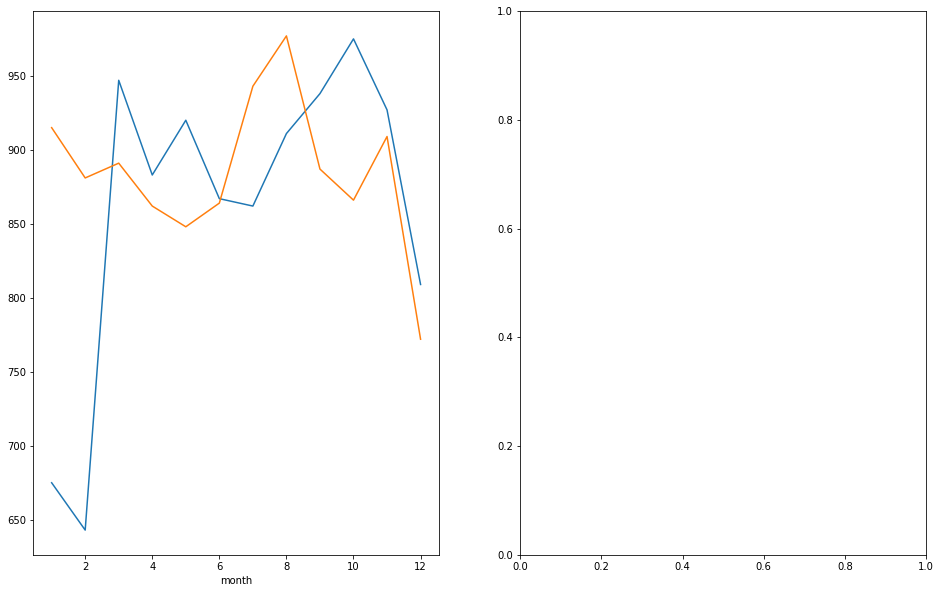

In [329]:
grafico = plt.subplots(nrows=1, ncols=2, figsize=(16,10) )
fig, ((g1, g2)) = grafico
df.iloc[0].plot(ax=g1, kind='line')
df.iloc[1].plot(ax=g1, kind='line')

In [327]:
df.iloc[0]

month
1     675
2     643
3     947
4     883
5     920
6     867
7     862
8     911
9     938
10    975
11    927
12    809
Name: 2020, dtype: int64